<a href="https://colab.research.google.com/github/KwameSegbe/Oring-Predictions-Logistic-Regression-/blob/main/Oring_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Naive Bayes and Logistic Regression.**
Francis Kwame Segbe.<bk>

Anlt 222: Machine Learning for Data Science.

#### **Importing Libraries.**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

### **Question 1:**

#### **Part 1: Minimize $f(x)=x^2+6x.$**

1) $f'(x)=2x+6$  (Finding The Derivative)<bk>

2) $f'(x)=2x+6=0$  (Setting The Derivative Equal to Zero)<bk>

3) $x=-3$  (Solving for the unkown x)<bk>

The function is minamized at the value $x=-3$.




#### **Part 2: Approximate Using Gradient Descent.**

In [ ]:
f=np.poly1d([1,6,0])
dfdx=f.deriv()

def simple_gradient_func(x,lr,dfdx):
    lastx=x

    for i in range(1000):
          x=x-lr*(dfdx(x))
          if np.abs(lastx-x)<0.0001:
              break
          lastx=x
    return x

grad_value=simple_gradient_func(0, 0.1, dfdx)

pd.DataFrame({"Actual Value":[-3],
              "Approximated Value":[grad_value],
              "Difference":[np.abs(grad_value+3)]})

,Actual Value,Approximated Value,Difference
0,-3,-2.999601,0.000399


### **Question 2:**

#### **Reading Data.**

In [ ]:
df=pd.read_csv("/content/sample_data/ORing.csv")
df.head().T

,0,1,2,3,4
Temp,53,56,57,63,66
Failure,1,1,1,0,0


#### **Part 1: Normalize Data.**

In [ ]:
### Finding Mu and Std
mu=df.Temp.mean()
sd=df.Temp.std()

### Scaling Data
Norm_Temp=(df.Temp-mu)/sd

### Displaying The Results
df2=pd.DataFrame({"Norm_Temp":Norm_Temp})
df2.head().T

### Adding Norm Temp to Df
df=pd.concat([df,df2],axis=1)
df.head().T

,0,1,2,3,4
Temp,53.000000,56.000000,57.000000,63.000000,66.000000
Failure,1.000000,1.000000,1.000000,0.000000,0.000000
Norm_Temp,-2.293007,-1.886366,-1.750818,-0.937535,-0.530893


#### **Part 2: Creating Logistic Model Using Gradient Descent.**

#### Step 1: Creating Numpy Arrays To Store Data.

Note: The X DataFrame has an appended column of 1s for the calculation of the intercept.

In [ ]:
# X Matrix and Shape
print("Here is a head of our X Train")
x1=np.array(df2).T[0]
x0=np.repeat(1,len(x1))
x=np.array([list(x0),list(x1)]).T
display(pd.DataFrame(x).head())
print("Here is a shape of our X Train")
display(x.shape)

# Y Matrix and Shape
y=np.array(df.Failure)
print("Here is a head of our Y Train")
display(pd.DataFrame(y).head())
print("Here is a shape of our Y Train")
display(y.shape)

Here is a head of our X Train


,0,1
0,1.0,-2.293007
1,1.0,-1.886366
2,1.0,-1.750818
3,1.0,-0.937535
4,1.0,-0.530893


Here is a shape of our X Train


(24, 2)

Here is a head of our Y Train


,0
0,1
1,1
2,1
3,0
4,0


Here is a shape of our Y Train


(24,)

#### Step 2: Creating A Logistic Model Function That Impliments Gradient Descent

In [ ]:
def logistic_model(X,Y,LR):
    # Defining The Sigmoid Function.
    def h(z):
        value=(1/(1+np.exp(-z)))
        return(value)

    # Setting initial value for W.
    w=np.repeat(0,X.shape[1])

    # Gradient Descent.
    for i in range(1000):
          z=X@w.T
          YHAT=h(z)
          dw=(YHAT-Y).T@x
          w=w-LR*dw
    return w

Step 3: Displaying Our Models Parameters.

In [ ]:
Model=pd.DataFrame(logistic_model(x,y,0.1),
             columns=["Coefficient Estimates"],
             index=["Beta0","Beta1"])
display(Model)

,Coefficient Estimates
Beta0,-1.102809
Beta1,-1.263917


Our obtained model was $\hat{f}(x)=\frac{1}{1+e^{-(-1.102809-1.263917x_{temp})}}$

#### **Part 3: Plot of Model and Data.**

,At X eqaul to :,Our predicted Probaility of O-Ring Failure based On Our Model is:
0,-0.872533,0.5


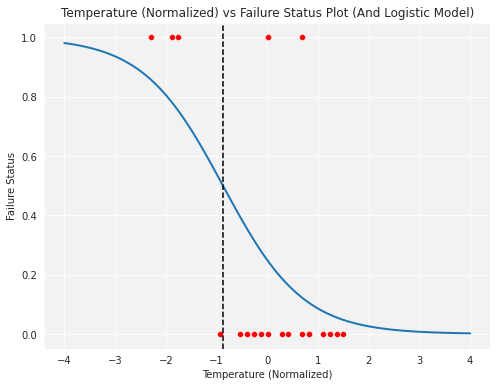

In [ ]:
### Defining Our Prediction Function
def pred_function(x):
        z=Model.iloc[0]+(Model.iloc[1]*x)
        value=(1/(1+np.exp(-z)))
        return(value[0])
pred_function=np.vectorize(pred_function)

### Creating vectors X and Y Linespace To A
x = np.linspace(-4, 4, 100)
y = pred_function(x)

### Finding The Value of X where P=0.5
x_boundry=(np.log(0.5/(1-0.5)) - Model.iloc[0]/Model.iloc[1])[0]
display(pd.DataFrame({"At X eqaul to :":[x_boundry],
                      "Our predicted Probaility of O-Ring Failure based On Our Model is:":[pred_function(x_boundry)]}))


### Plot Size and Style
sb.set_style("darkgrid", {"axes.facecolor": ".95"})
plt.figure(figsize=(8, 6))

#### Constructing The Graph
plot1=sb.scatterplot(x="Norm_Temp",
               y="Failure",
               color="red",
               data=df)
plt.plot(x,y, linewidth=2)
plt.axvline(x = (np.log(0.5/(1-0.5)) - Model.iloc[0]/Model.iloc[1])[0], color = 'black', linestyle='--')

#### Adding Axis Labels
plt.xlabel("Temperature (Normalized)")
plt.ylabel("Failure Status")
plt.title("Temperature (Normalized) vs Failure Status Plot (And Logistic Model)")
plt.show(plot1)

The plot above showcase our data, the decision boundry (dotted black line), and the sigmoid function. Anything to the left of the black line will be predicted as 1 and anything to the right will be predicted 0.

#### **Part 4: Prediction**

In [ ]:
# Normalizing The Test Point
x_test=31
x_norm=(x_test-mu)/sd

# Displaying the predicted probability:
display(pd.DataFrame([pred_function(x_norm)],
                     index=["Probaility of O-Ring Failure based On Model"]))

# Displaying Range Of The Train Data:
display(df.describe().iloc[[3,7]])
display(df.shape)

,0
Probaility of O-Ring Failure based On Model,0.996183


,Temp,Failure,Norm_Temp
min,53.0,0.0,-2.293007
max,81.0,1.0,1.502315


(24, 3)

The predicted proability of O-ring failure is 0.996183. I personally would not advise the engineers to use our model for two primary reasons. <bk>

1) First, the temperature was outside the range of our train data (the temperatures in our initial data set ranged from 53-81). From my research,  
extrapolation generally seems fround upon.  <bk>

2) Additionally, our initial data set was generally pretty small (only 24 observations).  <bk>